# Imports

In [1]:
# !pip install pypolyagamma

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import importlib
import os
import sys

from base.experiment import *
from logistic.env_logistic import *
from logistic.agent_logistic import *

import numpy as np
import pandas as pd
import plotnine as gg

# 2-D

In [6]:
name = 'logistic'
num_articles = 3
dim = 2
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
#batch_size = 50
step_count=100
step_size=0.1

alpha=0.2
beta=0.5
tol=0.0001

n_steps = 100

laplace_agent = LaplaceTSLogisticBandit(num_articles, dim+1, theta_mean, theta_std, epsilon1,
                          alpha,beta,tol)
langevin_agent = BasicLangevinTS(num_articles, dim+1, [0,0,0], cov=None, step_size=step_size, n_steps=step_count, init_pt=None)
agents = [laplace_agent, langevin_agent]
env = LogisticBandit(num_articles, dim+1, None, None)
experiment = ExperimentCompare(agents, env, n_steps,
               seed=0) #, rec_freq=1, unique_id='NULL')




theta [2.54520078 1.08081191 0.48431215]


In [7]:
experiment.run_experiment()
results = []
results.append(experiment.results)

(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.001726
...........................................................................(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.041479
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000461
.....................................................................................................................................................................................................................................(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.114989
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000579
.............................................................................(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.032233
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000305
....................................................................................................................................................................

(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000209
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.000948
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000206
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001100
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000207
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001141
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000209
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.000812
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000208
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.000840
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000206
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.000966
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000208
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001123
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000208
..(u

In [10]:
df = pd.DataFrame(results[0])
print(df)


     action_id  agent_id  cum_optimal  cum_regret  instant_regret    t  \
0            1         1     0.983862    0.029972        0.029972    1   
1            2         2     0.983862    0.009794        0.009794    1   
2            3         1     1.937752    0.056612        0.026639    2   
3            4         2     1.937752    0.036433        0.026639    2   
4            5         1     2.921614    0.113224        0.056612    3   
5            6         2     2.921614    0.093045        0.056612    3   
6            7         1     3.905477    0.113224        0.000000    4   
7            8         2     3.905477    0.093045        0.000000    4   
8            9         1     4.889339    0.113224        0.000000    5   
9           10         2     4.889339    0.123018        0.029972    5   
10          11         1     5.843229    0.139863        0.026639    6   
11          12         2     5.843229    0.123018        0.000000    6   
12          13         1     6.827091 

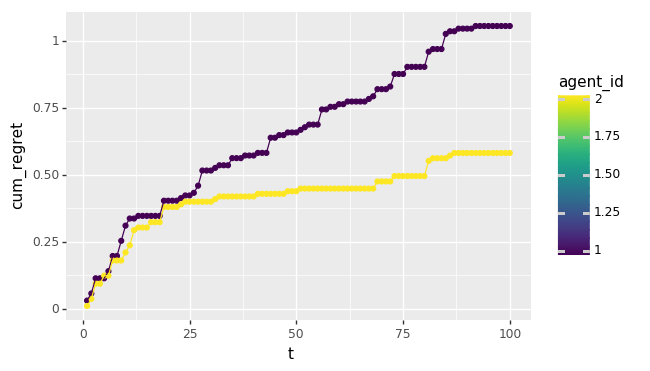

<ggplot: (8769594214729)>

In [11]:
(gg.ggplot(df)
 + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
 + gg.geom_point()
 + gg.geom_line())

# Others

In [1]:


#from base import config_lib

#reload(config_lib)


name = 'logistic'
num_articles = 3
dim = 7
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
batch_size = 50
step_count=200
step_size= 1/200

alpha=0.2
beta=0.5
tol=0.0001

n_steps = 1000

laplace_agent = LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                          alpha,beta,tol)
langevin_agent = LangevinTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                          alpha,beta,tol,batch_size,step_count,step_size)
agents = [laplace_agent, langevin_agent]
env = LogisticBandit(num_articles, dim, None, None)
experiment = ExperimentCompare(agents, env, n_steps,
               seed=0) #, rec_freq=1, unique_id='NULL')

experiment.run_experiment()
results = []
results.append(experiment.results)



theta [-0.97769555  0.22777848  0.65704823 -0.89302459  0.05340289  0.69765882
 -1.4476157 ]
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.001566
..............................................................(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.018503
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.027187
...........................................................................(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.022236
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000233
..........................................................................................................................................................................................................................(update_observation, Lapla

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.024439
........................(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.007519
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000304
..........(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003258
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.024131
..............(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.004448
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..........................................................................................(up

......(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003055
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.024603
.(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.000753
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000329
.......(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002566
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.024734
........(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002691
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000337
.......(update_observation, LaplaceTSLogisticBandi

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034148
.......(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002452
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000299
....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001493
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033015
.......(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002322
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000326
....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001574
**************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033840
.....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001797
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000303
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001224
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.032731
.....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001878
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000338
.....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002009
******************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033531
....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001471
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000335
.....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002003
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.031837
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001297
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001499
********************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033515
....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001759
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001661
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.032291
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001338
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000328
....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001706
*********************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033648
....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001809
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000304
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001431
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.032549
.......(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003058
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000332
....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001823
******************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033946
....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001897
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000399
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001466
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.032441
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001522
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000333
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001096
************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033769
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001480
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000329
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001644
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033140
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001491
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000317
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001689
************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034638
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001488
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001059
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033264
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001049
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000293
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001108
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034688
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001092
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000301
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001692
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033248
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001091
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000333
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001557
**************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035267
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001602
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001683
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033327
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001640
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001606
************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035426
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001219
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000295
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001180
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033594
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001186
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002199
**************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037732
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001728
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001212
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034557
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001698
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000295
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001710
*************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036462
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001784
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000295
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001257
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033526
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001162
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000222
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001200
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036689
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001287
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000299
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001292
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034858
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001810
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001862
**************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.032637
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001323
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001462
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034922
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001367
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001891
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038085
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001367
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001371
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035135
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001403
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001932
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038332
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002027
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001415
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035090
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001444
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001414
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037610
....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.010613
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000276
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001486
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033116
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001886
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001729
*************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038506
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001499
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001905
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035175
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001500
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002250
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036977
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001550
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000297
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001587
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035121
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001575
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000297
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002310
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037172
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001601
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001629
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035215
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001593
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000397
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001642
****************************************************************

..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.004106
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001687
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035425
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001646
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001681
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035354
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037088
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001759
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001724
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035302
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001743
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001723
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034478
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001863
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000221
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001689
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033455
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001688
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000223
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001939
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034480
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001888
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000275
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001931
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033758
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001862
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000277
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001886
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037416
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001913
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000295
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001915
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035567
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001906
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001926
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037550
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001989
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000395
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001978
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035683
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001936
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001977
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037559
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001997
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000295
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002027
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035898
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002006
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000295
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002041
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037616
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002082
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000297
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002058
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035673
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002185
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002096
****************************************************************

...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.004436
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033736
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002145
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000272
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002304
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.028577
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.004386
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000295
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037536
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002220
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000300
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002190
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036113
.................(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.015008
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000300
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002217
*************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037359
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003221
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000303
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002291
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036058
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002286
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000297
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002255
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.039211
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002346
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000301
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002360
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035932
.....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.005106
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002364
*************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.039555
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002395
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000301
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002410
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036073
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002362
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000300
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002511
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037907
....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.004336
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000303
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002588
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036188
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002483
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000300
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002498
**************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038061
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002519
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000304
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002554
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036258
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002559
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000303
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002554
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035035
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002993
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000309
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002707
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036216
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002618
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000300
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002622
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038103
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002714
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000304
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002704
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036420
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002631
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000300
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002702
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038119
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002762
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000306
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002732
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036377
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002773
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000301
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002785
****************************************************************

..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.007782
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038363
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002993
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000336
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002846
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036352
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003921
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000312
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0

..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.005395
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000313
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002912
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036551
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.004032
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000302
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002922
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036624
...(update_observation, LangevinTSLogisticBandit) Time Elapsed:

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.041690
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003312
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000356
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003182
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.039985
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003168
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000341
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.006129
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038500
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.004287
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000323
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003100
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036625
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003103
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000311
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003109
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038484
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003200
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000322
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003179
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036469
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003192
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000318
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003195
****************************************************************

..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003278
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038532
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003377
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000327
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003279
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036582
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003396
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000316
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038678
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003495
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000327
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003407
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035341
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.006183
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000318
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003407
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038484
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003629
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000337
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003530
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036821
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003533
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000323
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003515
****************************************************************

..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.006520
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000362
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003632
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036858
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003650
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000322
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003635
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037012
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038864
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003949
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000341
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003893
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036845
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003817
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000326
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003903
****************************************************************

TypeError: 'DataFrame' object is not callable

In [5]:
results

[      action_id  agent_id  cum_optimal  cum_regret  instant_regret     t  \
 0             1         1     0.476799    0.000000        0.000000     1   
 1             2         2     0.476799    0.395537        0.395537     1   
 2             3         1     0.797639    0.000000        0.000000     2   
 3             4         2     0.797639    0.395537        0.000000     2   
 4             5         1     1.274438    0.000000        0.000000     3   
 5             6         2     1.274438    0.721448        0.325911     3   
 6             7         1     1.761377    0.166099        0.166099     4   
 7             8         2     1.761377    1.127124        0.405676     4   
 8             9         1     2.191821    0.312460        0.146361     5   
 9            10         2     2.191821    1.273484        0.146361     5   
 10           11         1     2.465171    0.312460        0.000000     6   
 11           12         2     2.465171    1.407077        0.133593     6   

      action_id  agent_id  cum_optimal  cum_regret  instant_regret     t  \
0             1         1     0.476799    0.000000        0.000000     1   
1             2         2     0.476799    0.395537        0.395537     1   
2             3         1     0.797639    0.000000        0.000000     2   
3             4         2     0.797639    0.395537        0.000000     2   
4             5         1     1.274438    0.000000        0.000000     3   
5             6         2     1.274438    0.721448        0.325911     3   
6             7         1     1.761377    0.166099        0.166099     4   
7             8         2     1.761377    1.127124        0.405676     4   
8             9         1     2.191821    0.312460        0.146361     5   
9            10         2     2.191821    1.273484        0.146361     5   
10           11         1     2.465171    0.312460        0.000000     6   
11           12         2     2.465171    1.407077        0.133593     6   
12          

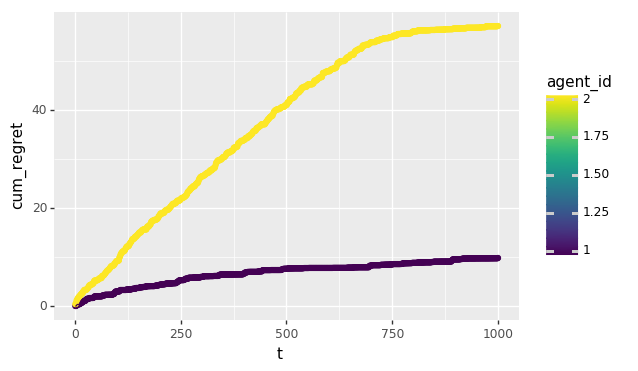

<ggplot: (8732685573365)>

In [13]:
import plotnine as gg

df = pd.DataFrame(results[0])
print(df)
(gg.ggplot(df)
 + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
 + gg.geom_point()
 + gg.geom_line())

In [4]:

#############################################################################
# Collating data with Pandas
params_df = config_lib.get_params_df(config)
df = pd.merge(pd.concat(results), params_df, on='unique_id')
plt_df = (df.groupby(['agent', 't'])
          .agg({'instant_regret': np.mean})
          .reset_index())


#############################################################################
# Plotting and analysis (uses plotnine by default)
gg.theme_set(gg.theme_bw(base_size=16, base_family='serif'))
gg.theme_update(figure_size=(12, 8))

p = (gg.ggplot(plt_df)
     + gg.aes('t', 'instant_regret', colour='agent')
     + gg.geom_line())
print(p)

NameError: name 'config_lib' is not defined